In [301]:
import datetime
import pandas as pd
import requests
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import plotly.express as px
import seaborn as sns
import numpy as np
import statsmodels.api as sm
mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['axes.grid'] = False

print("import succesfull")

import succesfull


In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/nyc_energy_consumption.csv')

# Quick Understanding of Data

In [5]:
df.head()

,timeStamp,demand,precip,temp
0,2012-01-01 00:00:00,4937.5,0.0,46.13
1,2012-01-01 01:00:00,4752.1,0.0,45.89
2,2012-01-01 02:00:00,4542.6,0.0,45.04
3,2012-01-01 03:00:00,4357.7,0.0,45.03
4,2012-01-01 04:00:00,4275.5,0.0,42.61


In [6]:
df.tail()

,timeStamp,demand,precip,temp
49200,2017-08-12 02:00:00,NaN,0.0000,70.84
49201,2017-08-12 03:00:00,NaN,0.0000,70.57
49202,2017-08-12 04:00:00,NaN,0.0000,69.89
49203,2017-08-12 05:00:00,NaN,0.0000,68.59
49204,2017-08-12 06:00:00,NaN,0.0031,67.33


In [9]:
print('shape of data:', df.shape)
print('no.of records in the given data:', df.shape[0])
print('-'*90)
print('checking for null values')
print(df.isnull().sum().any())
print('-'*90)
print('Unique values in each feature:', '\n',df.nunique())
print('-'*90)
print(df.info())
print('-'*90)
print('Summary statistics of data: \n', df.describe().round(2).T)
print('-'*90)

shape of data: (49205, 4)
no.of records in the given data: 49205
------------------------------------------------------------------------------------------
checking for null values
True
------------------------------------------------------------------------------------------
Unique values in each feature: 
 timeStamp    49205
demand       40972
precip        1004
temp          7580
dtype: int64
------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49205 entries, 0 to 49204
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timeStamp  49205 non-null  object 
 1   demand     49124 non-null  float64
 2   precip     48975 non-null  float64
 3   temp       49019 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.5+ MB
None
------------------------------------------------------------------------------------------
Summary statis

## Missing values

In [10]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [11]:
missing_values_table(df)

Your selected dataframe has 4 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
precip,230,0.5
temp,186,0.4
demand,81,0.2


In [23]:
# printing observations with 'demand' missing
df[df['demand'].isna()]

,timeStamp,demand,precip,temp
49124,2012-03-11 02:00:00,NaN,0.0000,37.78
49125,2013-03-10 02:00:00,NaN,0.0000,38.18
49126,2014-03-09 02:00:00,NaN,0.0000,40.86
49127,2015-03-08 02:00:00,NaN,0.0000,36.96
49128,2015-03-11 11:00:00,NaN,0.0000,49.95
...,...,...,...,...
49200,2017-08-12 02:00:00,NaN,0.0000,70.84
49201,2017-08-12 03:00:00,NaN,0.0000,70.57
49202,2017-08-12 04:00:00,NaN,0.0000,69.89
49203,2017-08-12 05:00:00,NaN,0.0000,68.59


#### A quick view of above df shows that energy values are missing more at every day 2:00

In [30]:
# forward filling NaN values
df['demand']= df['demand'].fillna(method='ffill')
df['temp']= df['temp'].fillna(method='ffill')
df['precip']= df['precip'].fillna(method='ffill')
print(df.isnull().sum())

timeStamp    0
demand       0
precip       0
temp         0
dtype: int64


In [28]:
# making timeStamp column datetime type
df['timeStamp']= pd.to_datetime(df['timeStamp'])

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49205 entries, 0 to 49204
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timeStamp  49205 non-null  datetime64[ns]
 1   demand     49205 non-null  float64       
 2   precip     49205 non-null  float64       
 3   temp       49205 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.5 MB


In [45]:
fig = px.line(df, x = 'timeStamp',y = 'demand',title = 'NYC_Energy_Consumption')

fig.update_xaxes(
    rangeslider_visible= True,
    rangeselector=dict(
                        buttons = list([
                        dict(count = 1,label = '1m',step='month',stepmode = "backward"),
                        dict(count = 2,label = '6m',step='month',stepmode = "backward"),
                        dict(count = 3,label = '6mYTD',step='month',stepmode = "todate"),
                        dict(count = 4,label = '2y',step='year',stepmode = "backward"),
                        dict(count = 5,label = '3y',step='year',stepmode = "backward"),
                        dict(step= 'all')
                            ])        
                        )
                   )
fig.show()

In [48]:
ny_df= df.set_index('timeStamp')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f94ad5a3110>,
      dtype=object)

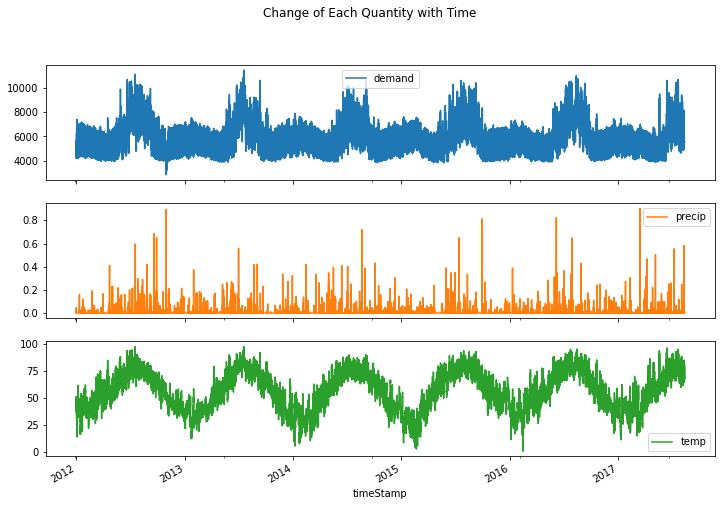

In [50]:
ny_df.plot(subplots=True, title= 'Change of Each Quantity with Time', figsize=(12,8))

###### A clear relation b/w temperature and demand can be observed from the plot that when temperature increases, demand also increases. Therefore the seasonality in demand is clearly observed



## Resampling Hourly Data to Monthly Data
##### This would be helpful for analytics as well as modelling

In [226]:
df_monthly= ny_df.resample('M').mean()

In [227]:
df_monthly.head()

,demand,precip,temp
timeStamp,,,
2012-01-31,5757.495833,0.003116,37.174288
2012-02-29,5622.331609,0.001650,40.448046
2012-03-31,5479.919198,0.001179,49.607917
2012-04-30,5368.945833,0.003959,54.255903
2012-05-31,5867.896102,0.005064,64.188078


In [72]:
print('Data points we have after resampling:', df_monthly.shape[0])

Data points we have after resampling: 68


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f94ace020d0>,
      dtype=object)

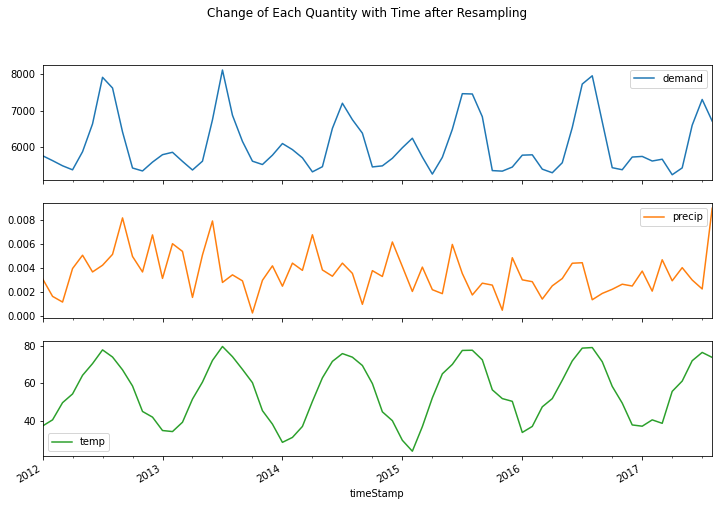

In [73]:
df_monthly.plot(subplots=True, title= 'Change of Each Quantity with Time after Resampling', figsize=(12,8))

##### Energy consumption is high (demand of energy) during summer season

In [77]:
df_monthly['year']= df_monthly.index.year
df_monthly['month']= df_monthly.index.month

In [78]:
df_monthly

,demand,precip,temp,year,month
timeStamp,,,,,
2012-01-31,5757.495833,0.003116,37.174288,2012,1
2012-02-29,5622.331609,0.001650,40.448046,2012,2
2012-03-31,5479.919198,0.001179,49.607917,2012,3
2012-04-30,5368.945833,0.003959,54.255903,2012,4
2012-05-31,5867.896102,0.005064,64.188078,2012,5
...,...,...,...,...,...
2017-04-30,5233.477382,0.002942,55.621764,2017,4
2017-05-31,5421.773060,0.004031,61.115457,2017,5
2017-06-30,6597.990346,0.003008,71.962625,2017,6


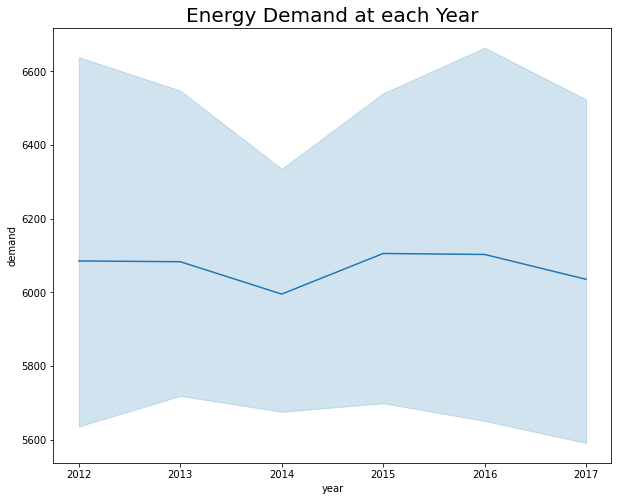

In [91]:
sns.lineplot(data=df_monthly, x='year', y='demand', palette='viridis')
plt.title('Energy Demand at each Year', size=20)
plt.show()

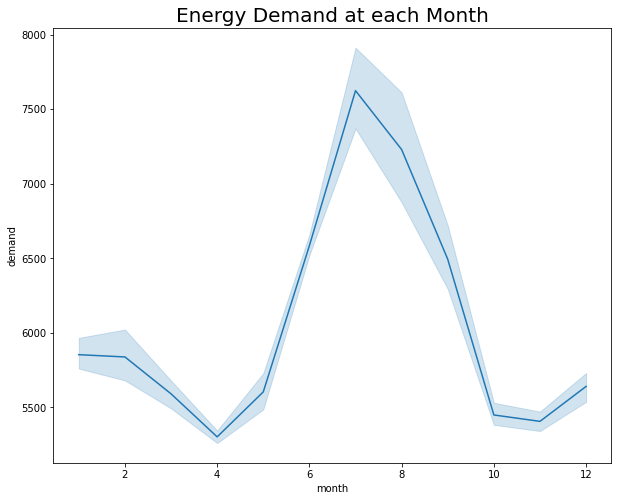

In [89]:
sns.lineplot(data=df_monthly, x='month', y='demand', palette='viridis')
plt.title('Energy Demand at each Month', size=20)
plt.show()

#### Demand is high during the month of july and august

Text(0.5, 1.0, 'Variation of Demand with Temperature')

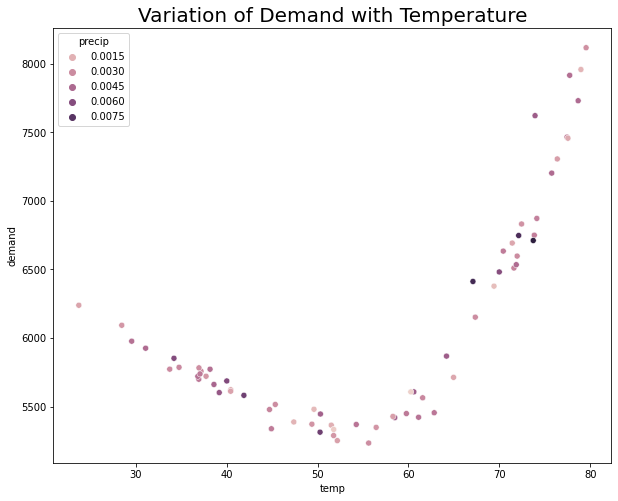

In [96]:
sns.scatterplot(data=df_monthly, x='temp', y='demand', hue='precip')
plt.title('Variation of Demand with Temperature', size=20)

#### Demand is decreasing with increase in temp upto 50-55 range and then increases with  increase in temperature.

Text(0.5, 1.0, 'Distribution of Temperature ')

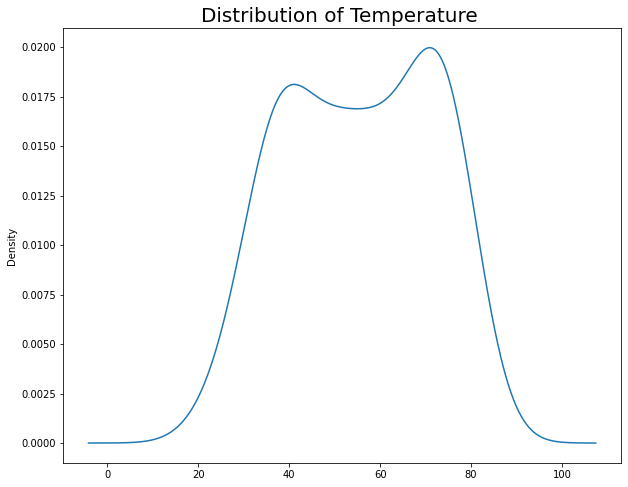

In [105]:
df_monthly['temp'].plot(kind='density')
plt.title('Distribution of Temperature ', size=20)

Text(0.5, 1.0, 'Distribution of Demand ')

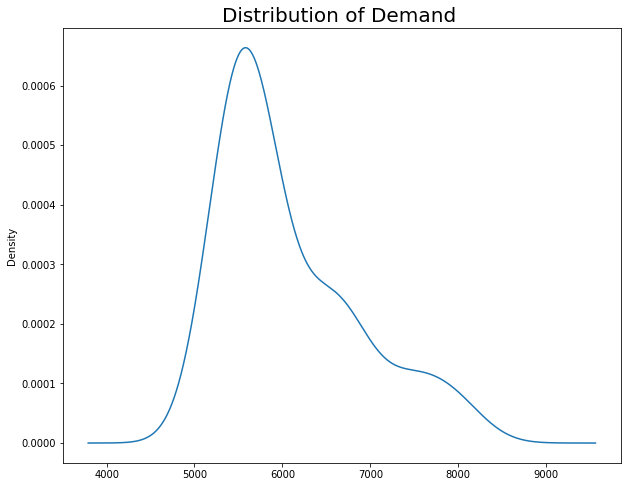

In [104]:
df_monthly['demand'].plot(kind='density')
plt.title('Distribution of Demand ', size=20)

Text(0.5, 1.0, 'Distribution of Precip ')

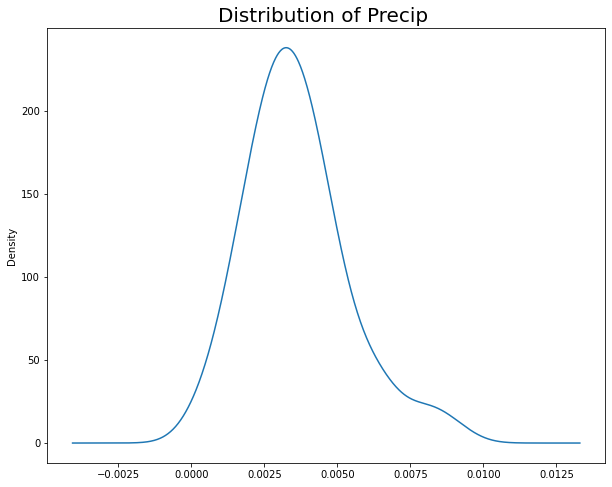

In [103]:
df_monthly['precip'].plot(kind='density')
plt.title('Distribution of Precip ', size=20)

In [108]:
import statsmodels
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.graphics.tsaplots as sgt
from scipy.stats.distributions import chi2
from statsmodels.tsa.seasonal import seasonal_decompose

## Seasonality

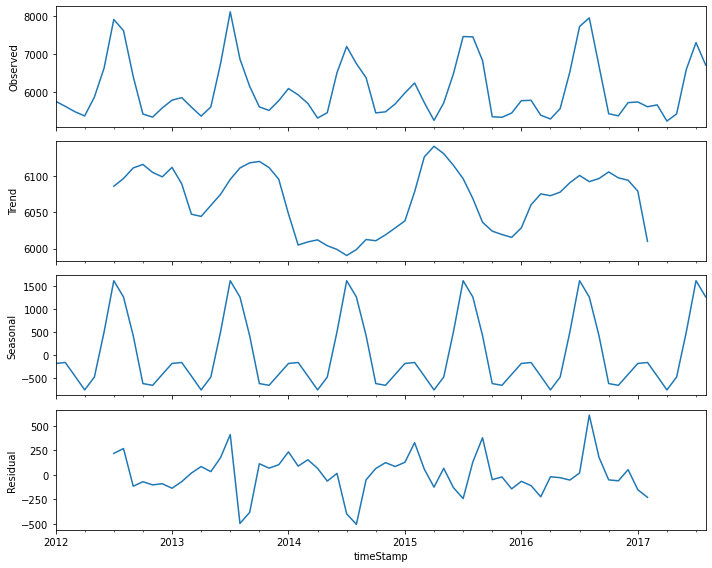

In [118]:
# computing addictive decompostion
s_dec_addictive= seasonal_decompose(df_monthly['demand'], model='additive')
s_dec_addictive.plot()
plt.show()

##### Addictive decomposition shows that there is seasonality but no trend

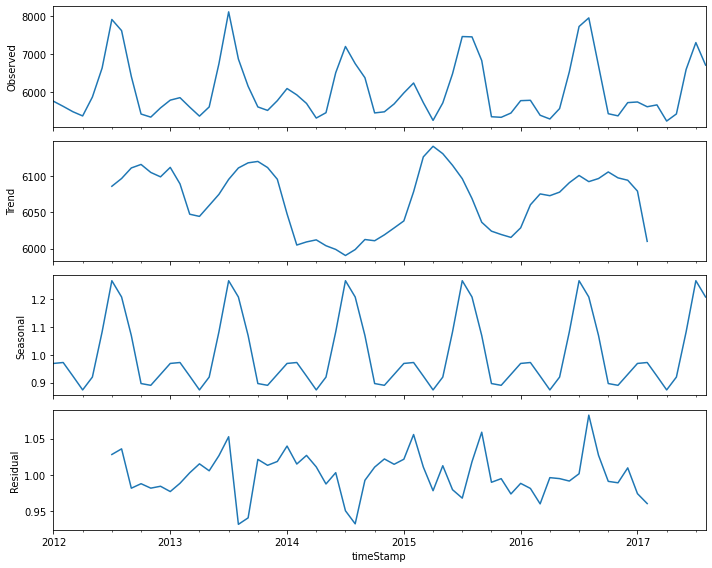

In [117]:
# computing multiplicative decompostion
s_dec_addictive= seasonal_decompose(df_monthly['demand'], model='multiplicative')
s_dec_addictive.plot()
plt.show()

#### Both additive and multiplicative decompostion remains same and we can see there is no trend in the data while seasonality exists

## Checking Stationarity of Data

In [218]:
# KPKSS TEST
from statsmodels.tsa.stattools import kpss
stats, p, lags, critical_values = kpss(df_monthly['demand'])
print(f'Test Statistics: {stats}')
print(f'p-value: {p}')
print(f'Critial Values: {critical_values}')

if p < 0.05 :
  print('Series is not Stationary')
else:
  print('Series is Stationary')

Test Statistics: 0.30716196075735563
p-value: 0.1
Critial Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Series is Stationary


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning:

The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning:

p-value is greater than the indicated p-value



In [219]:
# ADFULLER TEST
from statsmodels.tsa.stattools import adfuller
result = adfuller(df_monthly['demand'])
print(f'Test Statistics: {result[0]}')
print(f'p-value: {result[1]}')
print(f'Critial Values: {result[4]}')

if result[1] > 0.05 :
  print('Series is not Stationary')
else:
  print('Series is Stationary')

Test Statistics: -9.279849335700288
p-value: 1.2597254058462721e-15
Critial Values: {'1%': -3.5463945337644063, '5%': -2.911939409384601, '10%': -2.5936515282964665}
Series is Stationary


#### Here KPKSS test says the data is not stationary while ADF test says its stationary. This is because the data is almost seems stationary(not perfectly). This is clear from the above plots.

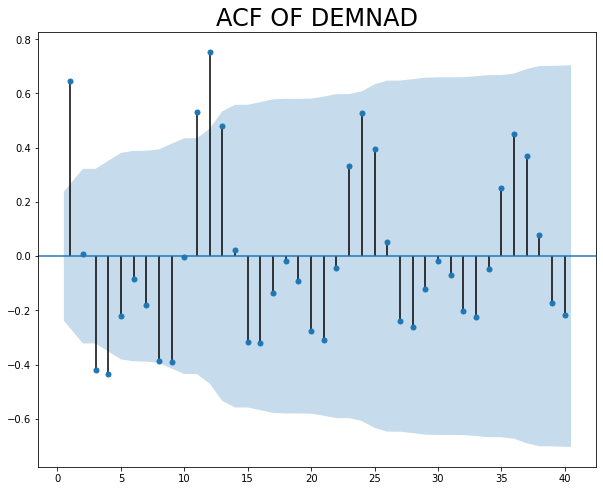

In [274]:
sgt.plot_acf(df_monthly['demand'], lags=40, zero= False)
plt.title('ACF OF DEMNAD', size=24);

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning:

invalid value encountered in sqrt



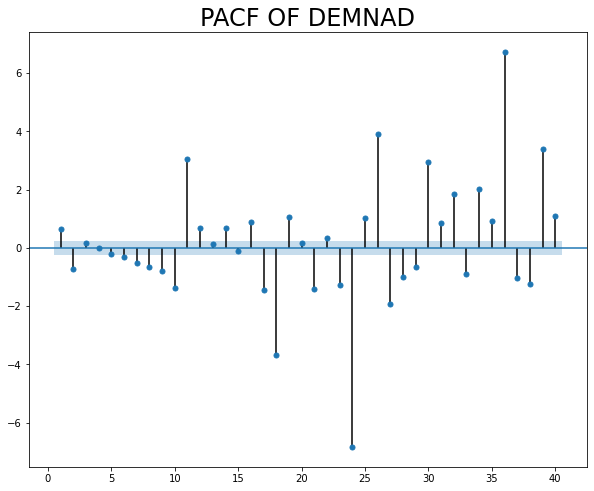

In [275]:
sgt.plot_pacf(df_monthly['demand'], lags=40, zero= False)
plt.title('PACF OF DEMNAD', size=24);

In [229]:
size= int(len(df_monthly)*0.8)
train= df_monthly.iloc[:size]
test= df_monthly.iloc[size:]

In [230]:
print(train.shape, test.shape)

(54, 3) (14, 3)


In [231]:
test

,demand,precip,temp
timeStamp,,,
2016-07-31,7731.891469,0.004442,78.675269
2016-08-31,7959.686890,0.001369,78.980242
2016-09-30,6693.131075,0.001894,71.421889
2016-10-31,5427.458699,0.002238,58.291196
2016-11-30,5371.189944,0.002659,49.377111
2016-12-31,5720.892685,0.002509,37.730417
2017-01-31,5737.960759,0.003749,37.063629
2017-02-28,5611.677426,0.002085,40.434955
2017-03-31,5660.977832,0.004687,38.599489


## Building AR Model

In [255]:
ar_1= ARIMA(train['demand'], order=(1,0,0))
ar_2= ARIMA(train['demand'], order=(2,0,0))
ar_3= ARIMA(train['demand'], order=(3,0,0))
ar_4= ARIMA(train['demand'], order=(4,0,0))
ar_5= ARIMA(train['demand'], order=(5,0,0))

results_ar_1= ar_1.fit()
results_ar_2= ar_2.fit()
results_ar_3= ar_3.fit()
results_ar_4= ar_4.fit()
results_ar_5= ar_5.fit()

### Analysing Results of Higher Lag AR Models

In [233]:
results_ar_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 demand   No. Observations:                   54
Model:                     ARMA(1, 0)   Log Likelihood                -418.484
Method:                       css-mle   S.D. of innovations            558.989
Date:                Sat, 12 Jun 2021   AIC                            842.969
Time:                        13:51:41   BIC                            848.936
Sample:                    01-31-2012   HQIC                           845.270
                         - 06-30-2016                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         6035.7379    198.423     30.419      0.000    5646.837    6424.639
ar.L1.demand     0.6280      0.104      6.068      0.000       0.425       0.831
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.5922           +0.0000j            1.5922            0.0000
-----------------------------------------------------------------------------
"""

In [234]:
results_ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 demand   No. Observations:                   54
Model:                     ARMA(2, 0)   Log Likelihood                -402.065
Method:                       css-mle   S.D. of innovations            407.678
Date:                Sat, 12 Jun 2021   AIC                            812.129
Time:                        13:52:02   BIC                            820.085
Sample:                    01-31-2012   HQIC                           815.198
                         - 06-30-2016                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         6050.0393     92.543     65.376      0.000    5868.659    6231.420
ar.L1.demand     1.0721      0.099     10.808      0.000       0.878       1.266
ar.L2.demand    -0.6772      0.097     -6.969      0.000      -0.868      -0.487
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.7915           -0.9220j            1.2152           -0.1371
AR.2            0.7915           +0.9220j            1.2152            0.1371
-----------------------------------------------------------------------------
"""

In [235]:
results_ar_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 demand   No. Observations:                   54
Model:                     ARMA(3, 0)   Log Likelihood                -402.060
Method:                       css-mle   S.D. of innovations            407.642
Date:                Sat, 12 Jun 2021   AIC                            814.119
Time:                        13:52:17   BIC                            824.064
Sample:                    01-31-2012   HQIC                           817.955
                         - 06-30-2016                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         6050.2599     91.336     66.241      0.000    5871.244    6229.276
ar.L1.demand     1.0625      0.137      7.735      0.000       0.793       1.332
ar.L2.demand    -0.6622      0.178     -3.724      0.000      -1.011      -0.314
ar.L3.demand    -0.0138      0.137     -0.101      0.920      -0.282       0.254
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.7914           -0.9141j            1.2091           -0.1364
AR.2            0.7914           +0.9141j            1.2091            0.1364
AR.3          -49.4398           -0.0000j           49.4398           -0.5000
-----------------------------------------------------------------------------
"""

In [237]:
results_ar_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 demand   No. Observations:                   54
Model:                     ARMA(4, 0)   Log Likelihood                -401.797
Method:                       css-mle   S.D. of innovations            405.540
Date:                Sat, 12 Jun 2021   AIC                            815.595
Time:                        13:52:49   BIC                            827.529
Sample:                    01-31-2012   HQIC                           820.197
                         - 06-30-2016                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         6047.0298    100.550     60.140      0.000    5849.956    6244.104
ar.L1.demand     1.0638      0.136      7.797      0.000       0.796       1.331
ar.L2.demand    -0.5949      0.199     -2.985      0.004      -0.985      -0.204
ar.L3.demand    -0.1194      0.199     -0.600      0.551      -0.509       0.271
ar.L4.demand     0.0989      0.136      0.726      0.471      -0.168       0.366
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.7351           -0.9442j            1.1966           -0.1447
AR.2            0.7351           +0.9442j            1.1966            0.1447
AR.3           -2.7922           -0.0000j            2.7922           -0.5000
AR.4            2.5302           -0.0000j            2.5302           -0.0000
-----------------------------------------------------------------------------
"""

In [238]:
results_ar_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 demand   No. Observations:                   54
Model:                     ARMA(5, 0)   Log Likelihood                -401.082
Method:                       css-mle   S.D. of innovations            399.640
Date:                Sat, 12 Jun 2021   AIC                            816.164
Time:                        13:53:02   BIC                            830.087
Sample:                    01-31-2012   HQIC                           821.534
                         - 06-30-2016                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         6051.8687     86.406     70.040      0.000    5882.515    6221.222
ar.L1.demand     1.0827      0.135      8.008      0.000       0.818       1.348
ar.L2.demand    -0.6166      0.196     -3.146      0.003      -1.001      -0.232
ar.L3.demand    -0.2177      0.211     -1.030      0.308      -0.632       0.196
ar.L4.demand     0.2722      0.196      1.387      0.172      -0.112       0.657
ar.L5.demand    -0.1615      0.134     -1.208      0.233      -0.423       0.101
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.5930           -0.0000j            1.5930           -0.5000
AR.2            0.9677           -0.9024j            1.3231           -0.1194
AR.3            0.9677           +0.9024j            1.3231            0.1194
AR.4            0.6717           -1.3302j            1.4902           -0.1756
AR.5            0.6717           +1.3302j            1.4902            0.1756
-----------------------------------------------------------------------------
"""

##### Out of AR models AR-1 and AR-2 seems best
## LLR TEST to Choose from Better Performing Models

In [265]:
def LLR_test(mod_1, mod_2, DF = 1):
    L1 = mod_1.llf
    L2 = mod_2.llf
    LR = (2*(L2-L1))    
    p = chi2.sf(LR, DF).round(3)
    return p

In [267]:
print('LLLR - Test:', LLR_test(results_ar_1, results_ar_2))

LLLR - Test: 0.0


### Since complex model (AR-2) yields higher log likely hood, its clear that  AR model with 2 lags performs better than AR model with 1 lag

In [268]:
train['res_demand_ar_2']=results_ar_2.resid

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [269]:
train

,demand,precip,temp,res_demand_ar_2
timeStamp,,,,
2012-01-31,5757.495833,0.003116,37.174288,-292.543445
2012-02-29,5622.331609,0.001650,40.448046,-240.716666
2012-03-31,5479.919198,0.001179,49.607917,-309.706754
2012-04-30,5368.945833,0.003959,54.255903,-359.541019
2012-05-31,5867.896102,0.005064,64.188078,161.935035
2012-06-30,6634.310278,0.003678,70.434472,318.288803
2012-07-31,7917.395296,0.004233,77.742823,1117.628536
2012-08-31,7622.954704,0.005136,73.931344,-33.329328
2012-09-30,6412.603472,0.008160,67.098111,-59.087993


In [270]:
train['res_demand_ar_2'].mean()

-5.552028869109672

In [271]:
train['res_demand_ar_2'].var()

170905.0496572891

In [272]:
adfuller(train.res_demand_ar_2)

(-2.1573160650530085,
 0.22210019322442193,
 11,
 42,
 {'1%': -3.596635636000432,
  '10%': -2.6049909750566895,
  '5%': -2.933297331821618},
 596.9281411409227)

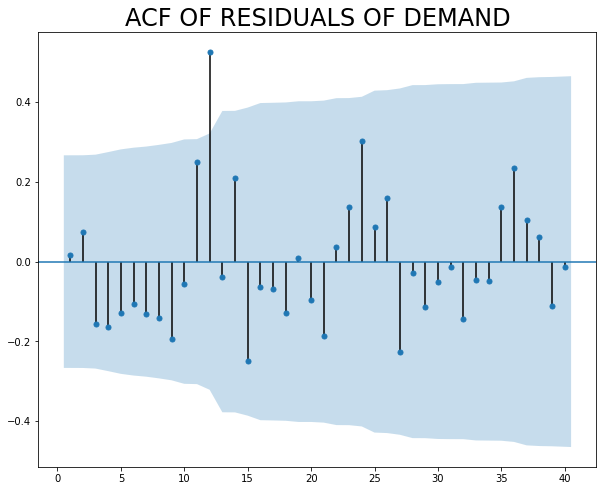

In [276]:
sgt.plot_acf(train.res_demand_ar_2, zero=False, lags=40)
plt.title('ACF OF RESIDUALS OF DEMAND', size=24);

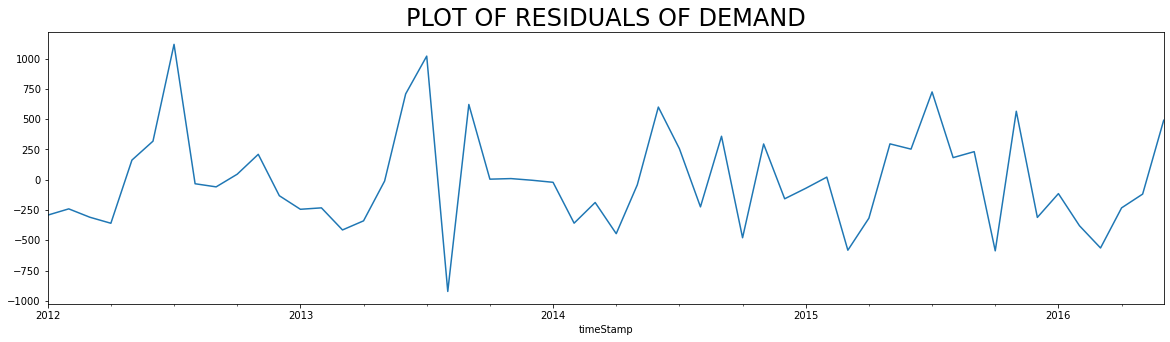

In [278]:
train['res_demand_ar_2'].plot(figsize=(20,5))
plt.title('PLOT OF RESIDUALS OF DEMAND', size= 24)
plt.show()

### Residuals seem like white noise. So we can stick on AR 2 model

In [289]:
test

,demand,precip,temp
timeStamp,,,
2016-07-31,7731.891469,0.004442,78.675269
2016-08-31,7959.686890,0.001369,78.980242
2016-09-30,6693.131075,0.001894,71.421889
2016-10-31,5427.458699,0.002238,58.291196
2016-11-30,5371.189944,0.002659,49.377111
2016-12-31,5720.892685,0.002509,37.730417
2017-01-31,5737.960759,0.003749,37.063629
2017-02-28,5611.677426,0.002085,40.434955
2017-03-31,5660.977832,0.004687,38.599489


In [297]:
start_date='2016-07-31'
end_date= '2017-08-31'

In [333]:
ar_2_pred= results_ar_2.predict(start=start_date, end=end_date).rename('AR_2 PRED')

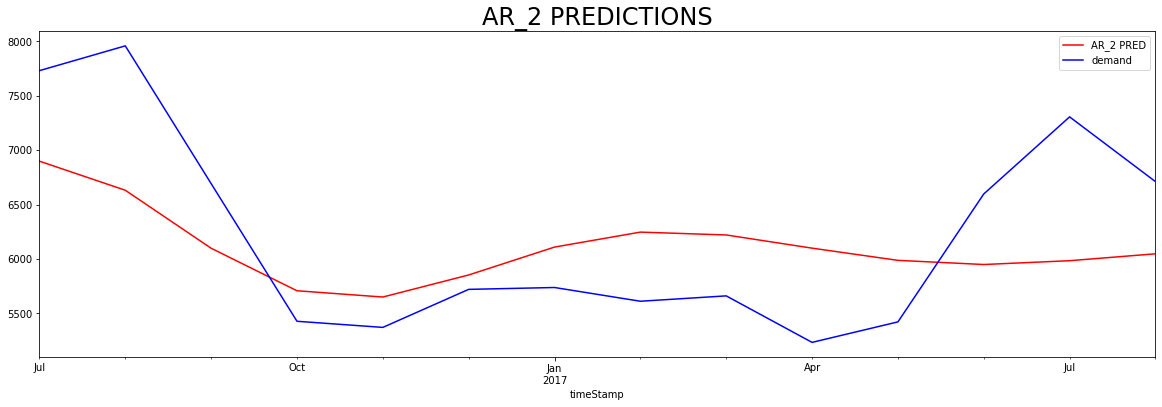

In [335]:
ar_2_pred[start_date:end_date].plot(figsize=(20,6), color='red')
test.demand[start_date:end_date].plot(color='blue')
plt.title('AR_2 PREDICTIONS', size=24)
plt.legend()
plt.show()

In [300]:
## AR_2 model doesnot fit perfectly to the data
## Let's peform seasonal arima

## SARIMA

In [325]:
sarima_model= sm.tsa.statespace.SARIMAX(train['demand'], order=(2,0,0), seasonal_order=(0,0,1,12))

In [326]:
results_sarima= sarima_model.fit(start_ar_lags= 10)
results_sarima.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                             demand   No. Observations:                   54
Model:             SARIMAX(2, 0, 0)x(0, 0, 1, 12)   Log Likelihood                -408.643
Date:                            Sat, 12 Jun 2021   AIC                            825.285
Time:                                    15:23:57   BIC                            833.241
Sample:                                01-31-2012   HQIC                           828.354
                                     - 06-30-2016                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2610      0.124     10.193      0.000       1.019       1.503
ar.L2         -0.2702      0.130     -2.073      0.038      -0.526      -0.015
ma.S.L12       0.9947      0.195      5.107      0.000       0.613       1.376
sigma2      1.363e+05   1.43e-06   9.52e+10      0.000    1.36e+05    1.36e+05
===================================================================================
Ljung-Box (Q):                      130.10   Jarque-Bera (JB):                 2.64
Prob(Q):                              0.00   Prob(JB):                         0.27
Heteroskedasticity (H):               0.88   Skew:                            -0.50
Prob(H) (two-sided):                  0.78   Kurtosis:                         3.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.21e+26. Standard errors may be unstable.
"""

In [336]:
sarima_pred=results_sarima.predict(start=start_date, end=end_date).rename('SAR PRED')

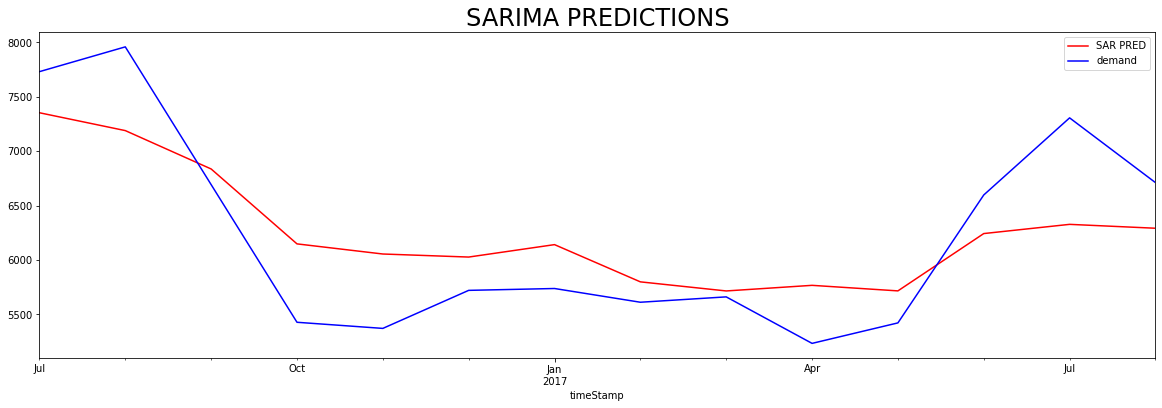

In [339]:
sarima_pred[start_date:end_date].plot(figsize=(20,6), color='red')
test.demand[start_date:end_date].plot(color='blue')
plt.title('SARIMA PREDICTIONS', size=24)
plt.legend()
plt.show()

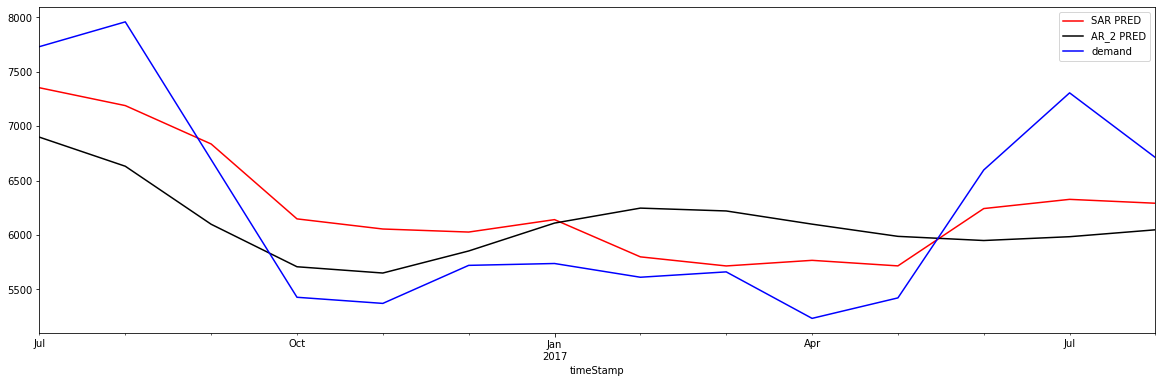

In [340]:
sarima_pred[start_date:end_date].plot(figsize=(20,6), color='red')
ar_2_pred[start_date:end_date].plot(figsize=(20,6), color='black')
test.demand[start_date:end_date].plot(color='blue')
plt.legend()
plt.show()

In [346]:
start_date='2016-07-31'
end_date= '2017-12-31'

In [347]:
sarima_pred=results_sarima.predict(start=start_date, end=end_date).rename('SAR PRED')
ar_2_pred= results_ar_2.predict(start=start_date, end=end_date).rename('AR_2 PRED')

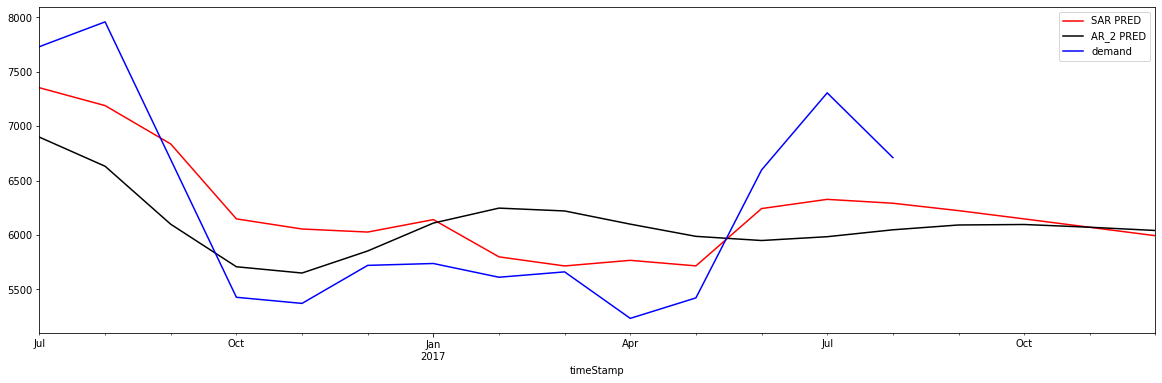

In [348]:
sarima_pred[start_date:end_date].plot(figsize=(20,6), color='red')
ar_2_pred[start_date:end_date].plot(figsize=(20,6), color='black')
test.demand[start_date:end_date].plot(color='blue')
plt.legend()
plt.show()

## AUTO ARIMA

In [351]:
!pip install pmdarima

     |████████████████████████████████| 1.5MB 27.5MB/s 
     |████████████████████████████████| 9.5MB 34.4MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [356]:
from pmdarima import auto_arima

In [357]:
model_auto= auto_arima(df_monthly['demand'])

In [358]:
model_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                   68
Model:               SARIMAX(2, 0, 0)   Log Likelihood                -506.605
Date:                Sat, 12 Jun 2021   AIC                           1021.211
Time:                        16:12:06   BIC                           1030.089
Sample:                             0   HQIC                          1024.728
                                 - 68                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3721.5907    507.051      7.340      0.000    2727.789    4715.393
ar.L1          1.0936      0.075     14.646      0.000       0.947       1.240
ar.L2         -0.7077      0.085     -8.364      0.000      -0.874      -0.542
sigma2      1.725e+05   3.37e+04      5.112      0.000    1.06e+05    2.39e+05
===================================================================================
Ljung-Box (Q):                      119.27   Jarque-Bera (JB):                 2.79
Prob(Q):                              0.00   Prob(JB):                         0.25
Heteroskedasticity (H):               0.83   Skew:                             0.50
Prob(H) (two-sided):                  0.66   Kurtosis:                         3.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [359]:
# Tuning Paramaters of auto-arima
model_auto_modified= auto_arima(df_monthly['demand'], max_order=None, m=12, max_p=12, max_q=3, max_d=2, 
                                max_P=4, max_Q=4, max_D=2, maxiter= 50, alpha=0.05, n_jobs=-1,
                                test='adf',error_action = 'ignore', suppress_warnings =True,stepwise =True,trace = True)

/usr/local/lib/python3.7/dist-packages/pmdarima/arima/_validation.py:77: UserWarning:

stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.



Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=nan sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1100.321, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1023.743, Time=0.52 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1380.758, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=1065.516, Time=0.02 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=1022.333, Time=1.64 sec
 ARIMA(1,0,0)(3,0,0)[12] intercept   : AIC=1036.894, Time=3.45 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=nan sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.71 sec
 ARIMA(1,0,0)(3,0,1)[12] intercept   : AIC=inf, Time=4.01 sec
 ARIMA(0,0,0)(2,0,0)[12] intercept   : AIC=1097.636, Time=0.82 sec
 ARIMA(2,0,0)(2,0,0)[12] intercept   : AIC=1016.828, Time=1.90 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=1014.036, Time=0.71 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=102

In [360]:
model_auto_modified.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   68
Model:             SARIMAX(2, 0, 0)x(0, 0, 1, 12)   Log Likelihood                -493.674
Date:                            Sat, 12 Jun 2021   AIC                            997.347
Time:                                    16:23:54   BIC                           1008.445
Sample:                                         0   HQIC                          1001.745
                                             - 68                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3721.6830    619.546      6.007      0.000    2507.396    4935.970
ar.L1          0.9841      0.098     10.088      0.000       0.793       1.175
ar.L2         -0.5995      0.112     -5.368      0.000      -0.818      -0.381
ma.S.L12       0.6766      0.160      4.240      0.000       0.364       0.989
sigma2      1.044e+05    1.8e+04      5.797      0.000    6.91e+04     1.4e+05
===================================================================================
Ljung-Box (Q):                       64.75   Jarque-Bera (JB):                 2.51
Prob(Q):                              0.01   Prob(JB):                         0.29
Heteroskedasticity (H):               0.82   Skew:                             0.37
Prob(H) (two-sided):                  0.63   Kurtosis:                         3.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [361]:
# fitting auto arima to training data
model_auto_modified.fit(train['demand'])

ARIMA(maxiter=50, method='lbfgs', order=(2, 0, 0), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 1, 12),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

In [362]:
forecast = model_auto_modified.predict(n_periods=14,return_conf_int=True)
#return_conf_int is True means it will print the confidance interval too
#in forecasting model we always takes the confidence interval into the account

In [363]:
forecast

(array([7410.26058874, 7084.62272618, 6471.580093  , 5652.72641903,
        5608.25779575, 5721.76238944, 5956.93145689, 5732.2764233 ,
        5667.11361624, 5712.91436155, 5683.95501795, 6234.74190232,
        6441.22271605, 6322.41523808]), array([[6798.88058846, 8021.64058902],
        [6233.99498203, 7935.25047033],
        [5593.72818611, 7349.43199989],
        [4765.47941715, 6539.97342091],
        [4686.34988545, 6530.16570604],
        [4788.2362233 , 6655.28855558],
        [5027.48480577, 6886.37810801],
        [4799.4670508 , 6665.08579581],
        [4730.2858809 , 6603.94135158],
        [4775.32047133, 6650.50825177],
        [4746.31684904, 6621.59318687],
        [5296.50539407, 7172.97841057],
        [5395.96118791, 7486.48424418],
        [5177.90790701, 7466.92256914]]))

In [364]:
# In the above array, first set is predicted values and the second set is confidencence interval values
forecast_df = pd.DataFrame(forecast[0],index=test.index,columns=['Prediction'])

In [365]:
forecast_df

,Prediction
timeStamp,
2016-07-31,7410.260589
2016-08-31,7084.622726
2016-09-30,6471.580093
2016-10-31,5652.726419
2016-11-30,5608.257796
2016-12-31,5721.762389
2017-01-31,5956.931457
2017-02-28,5732.276423
2017-03-31,5667.113616


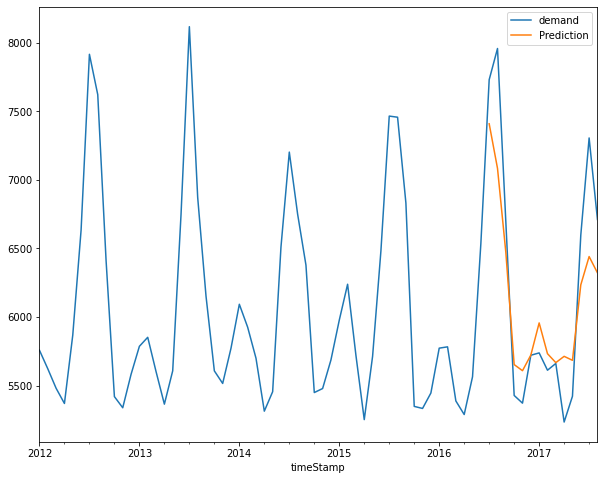

In [366]:
pd.concat([df_monthly['demand'],forecast_df],axis=1).plot()

In [368]:
forecast1 = model_auto_modified.predict(n_periods=20,return_conf_int=True)

In [370]:
forecast_range = pd.date_range(start=start_date,periods=20,freq='M')

In [371]:
forecast_range

DatetimeIndex(['2016-07-31', '2016-08-31', '2016-09-30', '2016-10-31',
               '2016-11-30', '2016-12-31', '2017-01-31', '2017-02-28',
               '2017-03-31', '2017-04-30', '2017-05-31', '2017-06-30',
               '2017-07-31', '2017-08-31', '2017-09-30', '2017-10-31',
               '2017-11-30', '2017-12-31', '2018-01-31', '2018-02-28'],
              dtype='datetime64[ns]', freq='M')

In [372]:
forecast1_df =pd.DataFrame(forecast1[0],index=forecast_range,columns=['Prediction'])

In [373]:
forecast1_df

,Prediction
2016-07-31,7410.260589
2016-08-31,7084.622726
2016-09-30,6471.580093
2016-10-31,5652.726419
2016-11-30,5608.257796
2016-12-31,5721.762389
2017-01-31,5956.931457
2017-02-28,5732.276423
2017-03-31,5667.113616
2017-04-30,5712.914362


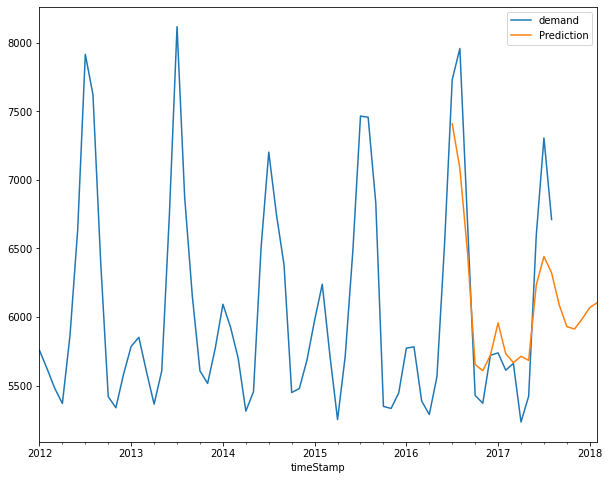

In [374]:
pd.concat([df_monthly['demand'],forecast1_df],axis=1).plot()

In [379]:
#Confidene interval
lower = pd.Series(forecast1[1][:,0],index=forecast_range)
upper = pd.Series(forecast1[1][:,1],index=forecast_range)

In [382]:
forecast1

(array([7410.26058874, 7084.62272618, 6471.580093  , 5652.72641903,
        5608.25779575, 5721.76238944, 5956.93145689, 5732.2764233 ,
        5667.11361624, 5712.91436155, 5683.95501795, 6234.74190232,
        6441.22271605, 6322.41523808, 6087.93371371, 5929.68917497,
        5912.17483291, 5986.7816272 , 6069.13786119, 6105.69394148]),
 array([[6798.88058846, 8021.64058902],
        [6233.99498203, 7935.25047033],
        [5593.72818611, 7349.43199989],
        [4765.47941715, 6539.97342091],
        [4686.34988545, 6530.16570604],
        [4788.2362233 , 6655.28855558],
        [5027.48480577, 6886.37810801],
        [4799.4670508 , 6665.08579581],
        [4730.2858809 , 6603.94135158],
        [4775.32047133, 6650.50825177],
        [4746.31684904, 6621.59318687],
        [5296.50539407, 7172.97841057],
        [5395.96118791, 7486.48424418],
        [5177.90790701, 7466.92256914],
        [4928.62753655, 7247.23989086],
        [4766.82396553, 7092.55438441],
        [4733.0886

In [380]:
lower

2016-07-31    6798.880588
2016-08-31    6233.994982
2016-09-30    5593.728186
2016-10-31    4765.479417
2016-11-30    4686.349885
2016-12-31    4788.236223
2017-01-31    5027.484806
2017-02-28    4799.467051
2017-03-31    4730.285881
2017-04-30    4775.320471
2017-05-31    4746.316849
2017-06-30    5296.505394
2017-07-31    5395.961188
2017-08-31    5177.907907
2017-09-30    4928.627537
2017-10-31    4766.823966
2017-11-30    4733.088608
2017-12-31    4799.872598
2018-01-31    4882.078746
2018-02-28    4917.099535
Freq: M, dtype: float64

In [381]:
upper

2016-07-31    8021.640589
2016-08-31    7935.250470
2016-09-30    7349.432000
2016-10-31    6539.973421
2016-11-30    6530.165706
2016-12-31    6655.288556
2017-01-31    6886.378108
2017-02-28    6665.085796
2017-03-31    6603.941352
2017-04-30    6650.508252
2017-05-31    6621.593187
2017-06-30    7172.978411
2017-07-31    7486.484244
2017-08-31    7466.922569
2017-09-30    7247.239891
2017-10-31    7092.554384
2017-11-30    7091.261058
2017-12-31    7173.690656
2018-01-31    7256.196977
2018-02-28    7294.288348
Freq: M, dtype: float64

Text(0.5, 1.0, 'FORECASTING DEMAND OF ELECTRICITY WITH 95% CI')

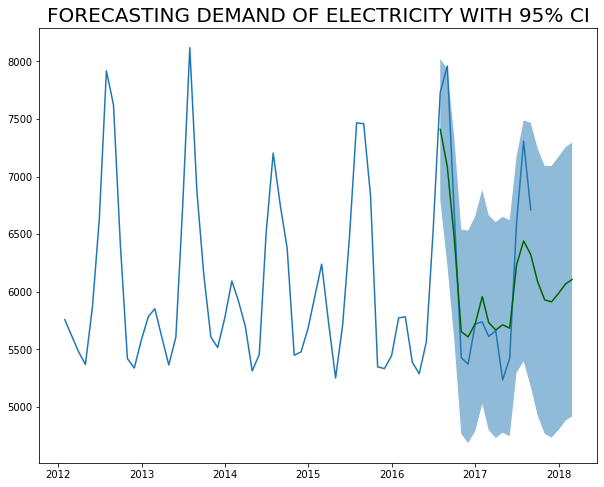

In [386]:
#plotting with confidence interval
plt.plot(df_monthly['demand'])
plt.plot(forecast1_df,color='darkgreen')
plt.fill_between(forecast_range,
                  lower,
                  upper,alpha = 1.5)
plt.title('FORECASTING DEMAND OF ELECTRICITY WITH 95% CI', size=20)

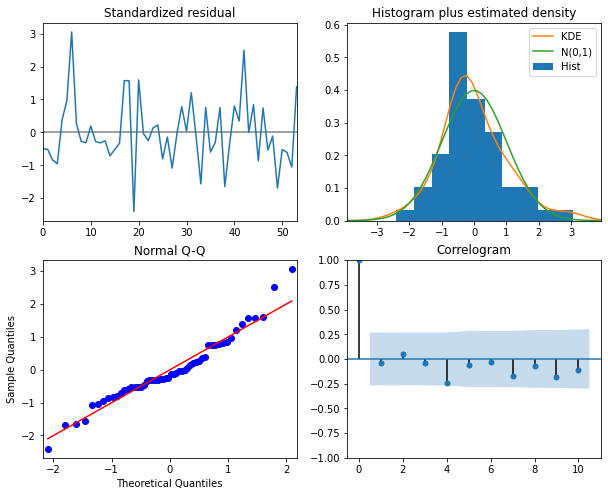

In [388]:
out = model_auto_modified.plot_diagnostics()